In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import os

## Loading MPEC results for each DA from 'Model_CVS'

In [2]:
print("Loading results from:")
files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
print("\t",files_path)
files_name = 'Model_data_DA_'
append_name ="_20221017-182603"
ncda = 9

data = []
for j in range(1,ncda+1):
    path = os.path.join(files_path,files_name+str(j)+append_name+'.csv')
    print("Reading file {} : {}".format(j,path))
    data.append(pd.read_csv(path))

Loading results from:
	 D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV
Reading file 1 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_1_20221017-182603.csv
Reading file 2 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_2_20221017-182603.csv
Reading file 3 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_3_20221017-182603.csv
Reading file 4 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_4_20221017-182603.csv
Reading file 5 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_5_20221017-182603.csv
Reading file 6 : D:\GitHub\PyomoModels\09_MPEC_Bidding_Diagonalization\MatlabCode\V06\ResultsAnalysis\Model_CSV\Model_data_DA_6_20221017-1826

## Loading Matlab Linear code results

In [3]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
lin_da_buy = pd.read_excel(files_name,'da_buy', header=None)
lin_da_sell = pd.read_excel(files_name,'da_sell', header=None)
lin_da_price = pd.read_excel(files_name,'Competitive LMPs', header=None)
lin_da_port_balance = pd.read_excel(files_name,'Protfolio Balance', header=None)
lin_Competitive_Profit = pd.read_excel(files_name,'Competitive Profit', header=None)
lin_gen = pd.read_excel(files_name,'g', header=None)

## Finding the opjective function
lin_comp_market.Objective = sum(sum(GenBids.*g))+sum(sum(da_price_offers.*da_sell))-sum(sum(da_price_bids.*da_buy));

In [52]:
da_loc = np.array([[0,0,0,0,0,0,0,0,0],
[0,0,0,0,0,0,0,0,0],
[1,1,1,0,0,0,0,0,0],
[0,0,0,1,1,1,0,0,0],
[0,0,0,0,0,0,1,1,1],
[0,0,0,0,0,0,0,0,0]])

gen_loc=np.array([[1,0,0,0],
[0,1,0,0],
[0,0,0,0],
[0,0,0,0],
[0,0,0,0],
[0,0,1,1]])

MVA =30

In [53]:
lin_da_buy_mat = lin_da_buy.to_numpy()
lin_da_sell_mat = lin_da_sell.to_numpy()
lin_da_price_mat = lin_da_price.to_numpy()
lin_gen_mat = lin_gen.to_numpy()

In [54]:
lin_gen_bus_price = np.matmul(gen_loc.T, lin_da_price_mat)
lin_da_bus_price = np.matmul(da_loc.T, lin_da_price_mat)

In [57]:
sum(np.multiply((lin_da_sell_mat - lin_da_buy_mat)*MVA, lin_da_bus_price))

array([-41250.        , -41250.        , -23022.5390005 , -12694.89526899,
        -7767.45119809,  -6203.85162482,  -4839.79343531,  -3753.80008926,
        -2830.21939072,  -2681.8088032 ,  -2519.69201965,  -2381.07668186,
        -2445.10821812,  -5027.47220622, -13080.64491342, -24750.        ,
       -41250.        , -41250.        , -41250.        , -41250.        ,
       -41250.        , -41250.        , -41250.        , -41250.        ])

In [60]:
lin_obj = sum(np.multiply(lin_gen_mat*MVA, lin_gen_bus_price)) + sum(np.multiply((lin_da_sell_mat - lin_da_buy_mat)*MVA, lin_da_bus_price))

In [61]:
lin_obj

array([ 0.00000000e+00, -7.27595761e-12,  3.63797881e-12,  5.45696821e-12,
       -1.81898940e-12, -2.72848411e-12,  9.09494702e-13, -1.81898940e-12,
       -1.36424205e-12, -1.81898940e-12,  9.09494702e-13, -1.36424205e-12,
       -9.09494702e-13, -1.81898940e-12,  0.00000000e+00,  0.00000000e+00,
       -1.45519152e-11, -2.18278728e-11,  0.00000000e+00, -1.45519152e-11,
        0.00000000e+00,  0.00000000e+00,  2.91038305e-11,  2.91038305e-11])

## Loading Objective function of the MPECs

"""
def social_welfare_optimization_rule(model):
        return sum(sum(c_g[i][t-16]*model.g[i,t] for i in model.G) +\
                    sum(c_d_o[i][t-16]*model.d_o[i,t] for i in model.NCDA ) -\
                        sum(c_d_b[i][t-16]*model.d_b[i,t] for i in model.NCDA) +\
                            sum(model.w_g_up[i,t] * g_s[i][t-16]/MVA for i in model.G) +\
                                sum(model.w_do_up[i,t]* F_d_o[i][t-16] for i in model.NCDA) +\
                                    sum(model.w_db_up[i,t]*F_d_b[i][t-16] for i in model.NCDA) +\
                                        sum(FMAX[i-1]*model.w_line_low[i,t] for i in model.LINES) +\
                                            sum(FMAX[i-1]*model.w_line_up[i,t] for i in model.LINES)  for t in model.T )
                                            """

In [99]:
def load_model_data(daNumber, appendName):
    files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
    files_name = 'Model_data_DA_'
    path = os.path.join(files_path,files_name+str(daNumber)+append_name+'.csv')
    df = pd.read_csv(path)
    return df
    
def load_model_dual_data(daNumber, appendName):
    files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
    files_name = 'Model_dual_variables_DA_'
    path = os.path.join(files_path,files_name+str(daNumber)+append_name+'.csv')
    df = pd.read_csv(path)
    return df

def load_price_offer():
    files_path = os.path.realpath(os.path.join(os.path.abspath(''), "Model_CSV"))
    file_name = "price_d_b.csv"
    path = os.path.join(files_path,file_name)
    df_c_d_b = pd.read_csv(path)
    
    file_name = "price_d_o.csv"
    path = os.path.join(files_path,file_name)
    df_c_d_o = pd.read_csv(path)
    
    return df_c_d_o, df_c_d_b

def load_data(appendName,files_path, files_name, ncda):
    data=[]
    for j in range(1,ncda+1):
        path = os.path.join(files_path,files_name+str(j)+appendName+'.csv')
        print("Reading file {} : {}".format(j,path))
        data.append(pd.read_csv(path, header=None))
    return data
    

In [100]:
appendName="_20221021-185407"
files_path = "Model_CSV"
files_name = "Model_obj_vlues_"
ncda = 9
data = load_data(appendName,files_path, files_name, ncda)

Reading file 1 : Model_CSV\Model_obj_vlues_1_20221021-185407.csv
Reading file 2 : Model_CSV\Model_obj_vlues_2_20221021-185407.csv
Reading file 3 : Model_CSV\Model_obj_vlues_3_20221021-185407.csv
Reading file 4 : Model_CSV\Model_obj_vlues_4_20221021-185407.csv
Reading file 5 : Model_CSV\Model_obj_vlues_5_20221021-185407.csv
Reading file 6 : Model_CSV\Model_obj_vlues_6_20221021-185407.csv
Reading file 7 : Model_CSV\Model_obj_vlues_7_20221021-185407.csv
Reading file 8 : Model_CSV\Model_obj_vlues_8_20221021-185407.csv
Reading file 9 : Model_CSV\Model_obj_vlues_9_20221021-185407.csv


In [101]:
obj_val_list =[]
for df in data:
    obj_val_list.append(df.iloc[df.index == 2].values.flatten().tolist())

In [102]:
df_mpec = pd.DataFrame(obj_val_list, columns = [x for x in range(24)])

In [103]:
df_mpec['DA']=['DA'+str(x) for x in range(1,ncda+1) ]
df_mpec['Model'] ='MPEC'

## Loading Matlab Linear code results

In [97]:
files_name = 'results_lin_comp_market_10-17-2022@20.41.xlsx'
df_lin = pd.read_excel(files_name,'Competitive Profit', header=None)
df_lin['DA'] = ['DA'+str(x) for x in range(1,ncda+1) ]
df_lin['Model'] = 'Optimal'

## Comparing Results

In [113]:
df_concat = pd.concat([df_lin, df_mpec]).reset_index(drop=True)

In [116]:
df_concat.groupby('Model').mean()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Model,,,,,,,,,,,,,,,,,,,,,
MPEC,2.569303,-18.424265,-93.165467,-166.44382,75.997888,0.380079,34.184281,-145.901813,43.741966,-134.648285,...,43.069219,-42.892442,-5.681367,17.382626,2.911927,0.612378,-0.413482,0.249364,0.649946,-0.012612
Optimal,-50.000000,-16.666667,60.000000,90.00000,105.614565,64.549419,36.666667,36.666667,38.364473,39.848579,...,90.000000,60.000000,-16.666667,-33.333333,-50.000000,-16.666667,0.000000,0.000000,0.000000,0.000000


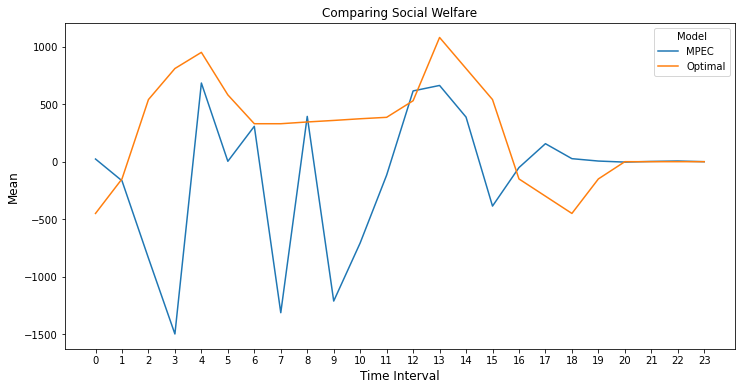

In [132]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))
df_temp = df_concat.groupby('Model').sum().reset_index().melt( id_vars='Model',var_name='Time', value_name='SociealWelfare')
sns.lineplot(data= df_temp, x='Time', y='SociealWelfare', hue='Model')#hue='category'
axes.set(xticks=[x for x in range(24)]);
axes.set_title("Comparing Social Welfare", fontsize=12)
axes.set_xlabel('Time Interval',fontsize=12);
axes.set_ylabel('SocialWelfare',fontsize=12);

,Model,Time,SociealWelfare
0,MPEC,0,2.569303
1,Optimal,0,-50.000000
2,MPEC,1,-18.424265
3,Optimal,1,-16.666667
4,MPEC,2,-93.165467
5,Optimal,2,60.000000
6,MPEC,3,-166.443820
7,Optimal,3,90.000000
8,MPEC,4,75.997888
9,Optimal,4,105.614565
